In [1]:
from sympy import *
from IPython.display import display, Math
import numpy as np
init_printing(use_unicode=True)
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm

In [19]:
from sympy import solve

x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'σ μ δ α β ρ η b λ')

sigma_c = 0.1181
ro_c = 1.131
eta_c = 20.19
alpha_c = 1.636
beta_c = 0.002
delta_c = 0.3743
mu_c = 0.005
b_c = 0

dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)

concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


In [20]:
display(Math('\dfrac{dx}{dt} = ' + latex(dxdt)))
display(Math('\dfrac{dy}{dt} = ' + latex(dydt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Точки равновесия

### 1

In [21]:
display(Math('x = ' + latex(sigma/delta)))
display(Math('y = 0' )) # Решение не зависит от μ

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
def get_solutions(cur_mu=concrete_params[mu]):
    params = dict(concrete_params)
    params[mu] = cur_mu
    return solve([dxdt.subs(params), dydt.subs(params)], x,y)

In [23]:
def display_solutions(sols):
    for s in sols:
        display(s)

In [24]:
def display_sol_list(sol_list):
    for cur_mu, sols in sol_list:
        print(f"mu = {cur_mu}")
        display_solutions(sols)
        display("*"*20)

In [25]:
# for s in get_solutions():
#     display(s)

#### Бифуркационная диаграмма

In [26]:
mus = np.linspace(0.002, 0.022, 50)
# mus

In [27]:
concrete_params

In [28]:
xs=[]
ys = []
mul = []
solutions_by_mu={}
for cur_mu in tqdm(mus):
    solutions = get_solutions(cur_mu)
    solutions_by_mu[cur_mu]= solutions
    # for s in solutions:
    #     if s[1]!=0:# and s[1].as_real_imag()[1]==0:#real
    #         ys.append(s[1].as_real_imag()[0])
    #         mul.append(cur_mu)
            
    

100%|███████████████████████████████████████████| 50/50 [01:44<00:00,  2.10s/it]


In [29]:
# for cur_mu, sols in list(solutions_by_mu.items()):
#     print(f"mu = {cur_mu}")
#     display_solutions(sols)
#     display("*"*20)

In [30]:
sols_list = list(solutions_by_mu.items())
display_sol_list(sols_list[:8])

mu = 0.002


'********************'

mu = 0.0024081632653061226


'********************'

mu = 0.0028163265306122448


'********************'

mu = 0.0032244897959183673


'********************'

mu = 0.0036326530612244895


'********************'

mu = 0.0040408163265306125


'********************'

mu = 0.004448979591836735


'********************'

mu = 0.004857142857142857


'********************'

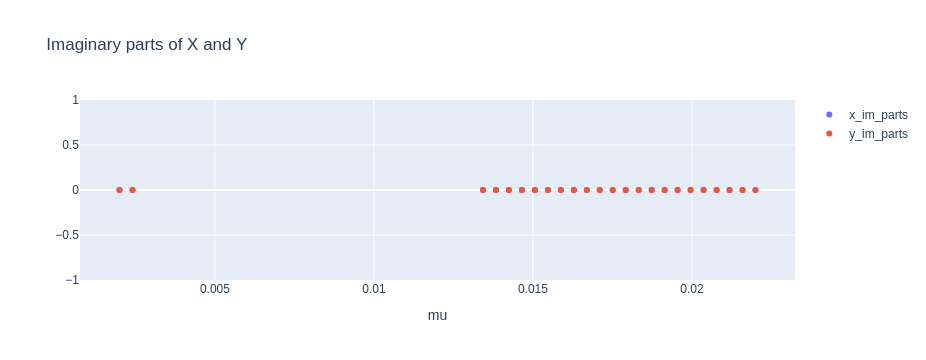

In [31]:
y_im_parts = []
x_im_parts = []
mus_for_im=[]
for cur_mu, sols in list(solutions_by_mu.items()):
    for xc,yc in sols:
        x_im_parts.append(float(xc.as_real_imag()[1]))
        y_im_parts.append(float(yc.as_real_imag()[1]))
        mus_for_im.append(cur_mu)
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_for_im, y=x_im_parts, mode='markers', name = "x_im_parts"))
fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Imaginary parts of X and Y")
fig.update_layout(xaxis={"title": "mu"})


На отрезке [0.005, 0.015] мнимая часть близка к нулю

In [32]:
mu_min = 0.0036
mu_max = 0.017
# filtered_solutions_by_mu = {mu:solutions_by_mu[mu] for mu in solutions_by_mu if mu_min<mu<mu_max}
filtered_solutions_by_mu = solutions_by_mu

In [33]:
# display_sol_list(list(filtered_solutions_by_mu.items())[:2])

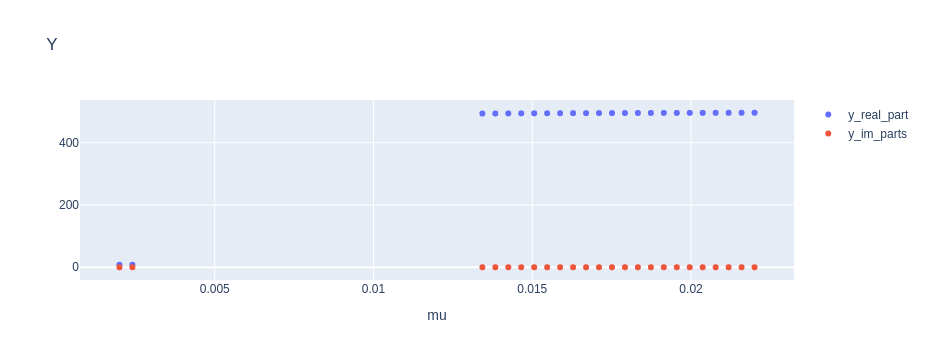

In [34]:

xs=[]
ys=[]
mus_bif = []
for cur_mu, sols in list(filtered_solutions_by_mu.items()):
    for xc,yc in sols:
        if yc!=0:# (σ/δ, 0) - решение, не зависящее от mu
            mus_bif.append(cur_mu)
            xs.append(float(xc.as_real_imag()[0]))
            ys.append(float(yc.as_real_imag()[0]))
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_bif, y=ys, mode='markers', name = "y_real_part"))
# fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Y")
fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))

fig.update_layout(xaxis={"title": "mu"})

In [17]:
dfdx = diff(dxdt, x)
dfdy = diff(dxdt, y)
dgdx = diff(dydt, x)
dgdy = diff(dydt, y)

In [18]:

display(Math('\dfrac{df}{dx} = ' + latex(dfdx)))
display(Math('\dfrac{df}{dy} = ' + latex(dfdy)))
display(Math('\dfrac{dg}{dx} = ' + latex(dgdx)))
display(Math('\dfrac{dg}{dy} = ' + latex(dfdy)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
eqilibrium = {x:sigma/delta, y:0}
a11 = dfdx.evalf(subs=eqilibrium)
a12 = dfdy.evalf(subs=eqilibrium)
a21 = dgdx.evalf(subs=eqilibrium)
a22 = dgdy.evalf(subs=eqilibrium)


Матрица первого приближения для равновесия (σ/δ, 0)

In [20]:
jacob_matrix = Matrix([[a11, a12], [a21, a22]])
jacob_matrix

⎡      μ⋅σ   ρ⋅σ⎤
⎢-δ  - ─── + ───⎥
⎢       δ    δ⋅η⎥
⎢               ⎥
⎢             σ ⎥
⎢0   -b + α - ─ ⎥
⎣             δ ⎦

In [21]:
jacob_matrix.eigenvals()

In [22]:
j = jacob_matrix - np.eye(2) * lambd

Собственные числа 

In [23]:
lam1, lam2 = solve(j.det(), lambd)
lam1, lam2

Устойчиво <=> СЗ имеют отрицательные вещественные части.

b > α − σ/δ = 1.32047 --- равновесие (σ/δ, 0) будет устойчивым

#### Aнализ в трех зонах с разной скоростью инактивации опухолевых клеток иммунными – µ, в которых будем варьировать параметр лечения b

b1 = 0.899, b2 = 0.982, b3 = 1.332 и b4 = 5.17.

In [24]:
def get_n_solutions_by_b(cur_mu, cur_b):
    params = dict(concrete_params)
    params[mu] = cur_mu
    params[b] = cur_b
    res = set()
    for y_start in np.linspace(0, 400, 100):
        try:
            res.add(ImmutableMatrix(nsolve([dxdt.subs(params), dydt.subs(params)], (x,y), (0,y_start)) ))
        except ValueError:
            pass
    return res
    return solve([dxdt.subs(params), dydt.subs(params)], x,y)

In [25]:
get_n_solutions_by_b( 0.001, 3)

⎧⎡-0.461143203066394⎤  ⎡-0.461143203066394⎤  ⎡  0.315522308308843  ⎤  ⎡  0.315
⎨⎢                  ⎥, ⎢                  ⎥, ⎢                     ⎥, ⎢       
⎩⎣ 639.504705601404 ⎦  ⎣ 639.504705601404 ⎦  ⎣-4.39678140261483e-23⎦  ⎣-2.8462

522308308843  ⎤  ⎡  0.315522308308843  ⎤  ⎡  0.315522308308843  ⎤  ⎡0.31552230
              ⎥, ⎢                     ⎥, ⎢                     ⎥, ⎢          
8652948253e-33⎦  ⎣-9.93962852930157e-35⎦  ⎣-6.44678367113368e-36⎦  ⎣        0 

8308843⎤  ⎡0.410744171868077⎤  ⎡1.15069925048416⎤  ⎡1.15069925048416⎤⎫
       ⎥, ⎢                 ⎥, ⎢                ⎥, ⎢                ⎥⎬
       ⎦  ⎣1.45803897113293 ⎦  ⎣5.41602082987494⎦  ⎣5.41602082987494⎦⎭

In [26]:
cur_mu = 0.001
solutions_by_b={}
bs = np.linspace(0, 5, 50)
for curb in tqdm(bs):
    solutions = get_n_solutions_by_b(cur_mu, curb)
    solutions_by_b[curb]= solutions

100%|███████████████████████████████████████████| 50/50 [01:38<00:00,  1.97s/it]


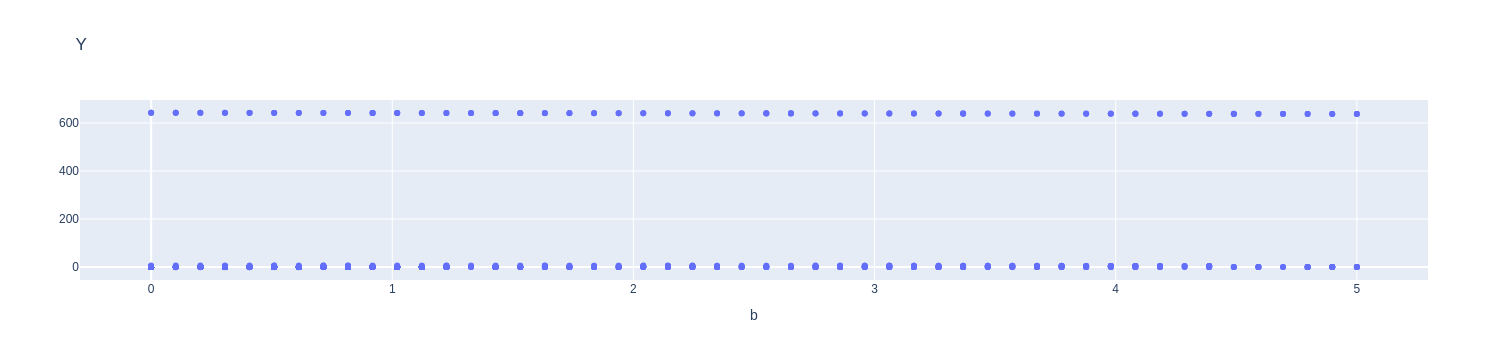

In [27]:

xs=[]
ys=[]
bs_bif = []
for curb, sols in list(solutions_by_b.items()):
    for xc,yc in sols:
        if yc!=0:# (σ/δ, 0) - решение, не зависящее от mu
            bs_bif.append(curb)
            xs.append(float(xc.as_real_imag()[0]))
            ys.append(float(yc.as_real_imag()[0]))
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=bs_bif, y=ys, mode='markers', name = "y_real_part"))
# fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Y")
# fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))

fig.update_layout(xaxis={"title": "b"})